In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns


flower = pd.read_csv('IRIS_ Flower_Dataset.csv')
flower.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
flower.shape

(150, 5)

In [6]:
flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Separate the features and the targets 

X = flower.drop("species", axis = 1)
y = flower["species"]

In [8]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [10]:
#Separate x and y dataframes into test and train dataframes 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=32)

In [11]:
# Function to train and evaluate the accuracy, classification report and the matrice of confusion

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'\nAccuracy : {accuracy * 100:.2f}%')
    
    print('\nClassification_report :')
    print(classification_report(y_test, y_pred))

    conf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Prédictions')
    plt.ylabel('Vraies valeurs')
    plt.title('Matrice de Confusion')
    plt.show()





Accuracy : 97.37%

Classification_report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



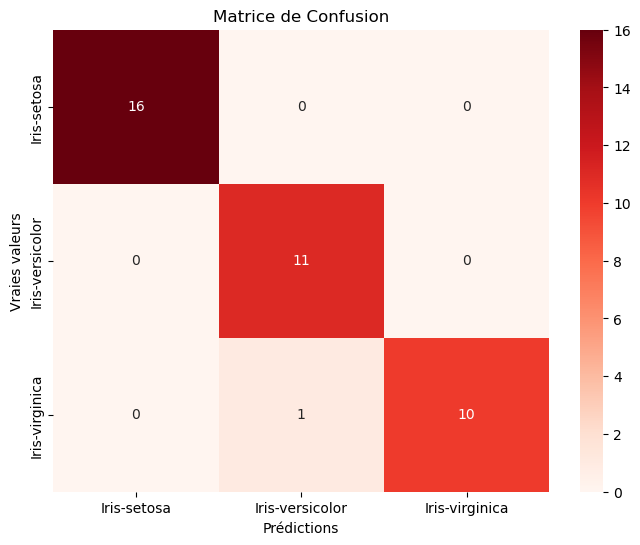

In [12]:
# The model random forest and his training with the importants inforrmations

rf_model = RandomForestClassifier(n_estimators=50, random_state=32)
train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)



Accuracy : 100.00%

Classification_report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        11
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



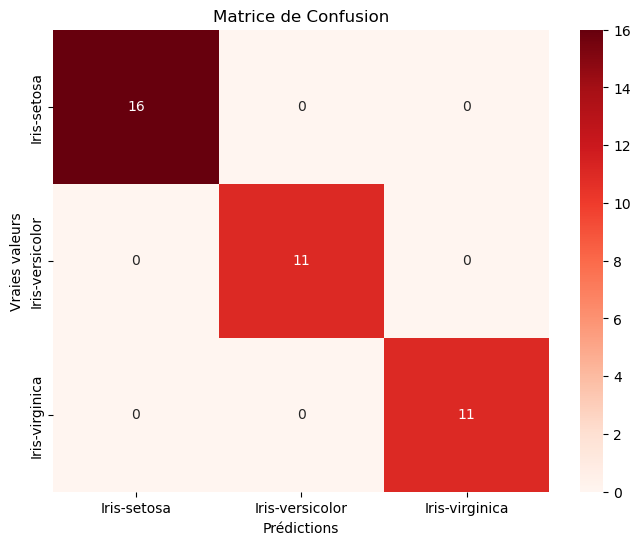

In [13]:
# Second try of a random forest model but with other hyperparaleters

rf_modelV2 = RandomForestClassifier(n_estimators=50, random_state=42)
train_and_evaluate_model(rf_modelV2, X_train, y_train, X_test, y_test)

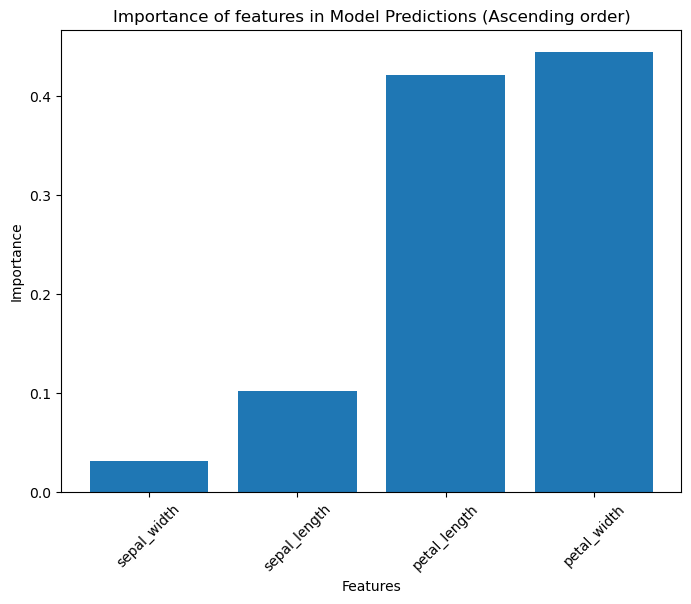

In [14]:
# Obtain the importances of each feature in the training and the prediction
feature_importances = rf_modelV2.feature_importances_

# Obtain the index of the features in ascending order
sorted_indices = np.argsort(feature_importances)

# Creation of the graph
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.xticks(range(len(feature_importances)), X.columns[sorted_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Importance of features in Model Predictions (Ascending order)')
plt.show()

In [15]:
#Function to find what kind a flower we have we specific features

def flower():
    tab_test = []

    sepal_length = float(input("sepal_length : "))
    tab_test.append(sepal_length)
    
    sepal_width = float(input("sepal_width : "))
    tab_test.append(sepal_width)
    
    petal_length = float(input("petal_length : "))
    tab_test.append(petal_length)
    
    petal_width = float(input("petal_width : "))
    tab_test.append(petal_width)

    tab_test2 = []
    tab_test2.append(tab_test)

    data_test = pd.DataFrame(tab_test2) #crée une dataframe à partir d'un tableau

    pred = rf_modelV2.predict(data_test)
    
    
    print("\n{}".format(pred))

In [16]:
flower()

sepal_length : 1
sepal_width : 1
petal_length : 1
petal_width : 1

['Iris-setosa']


C:\Users\guill\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
